In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [156]:
df = pd.read_csv('/content/sample_data/Heart_disease_cleveland_new.csv')

In [157]:
df.head(n=3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1


In [158]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [159]:
# handle missing data

In [160]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [161]:
df['ca' ].unique()

array([0, 3, 2, 1])

In [162]:
df['thal'].unique()

array([2, 1, 3])

In [163]:
len(df)

303

In [164]:
len(df.loc[df['ca'] == '?'])

0

In [165]:
df_encoded = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'])

In [166]:
df_encoded.head(n = 3)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,cp_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,...,False,False,False,True,False,False,True,False,True,False
1,67,1,160,286,0,108,1,1.5,3,1,...,True,False,False,True,False,True,False,True,False,False
2,67,1,120,229,0,129,1,2.6,2,1,...,True,False,False,True,False,True,False,False,False,True


In [167]:
df_encoded["target"].unique()

array([0, 1])

In [168]:
y = df_encoded['target']
X = df_encoded.drop('target', axis=1)

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [170]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)
y_predicted = clf_dt.predict(X_test)


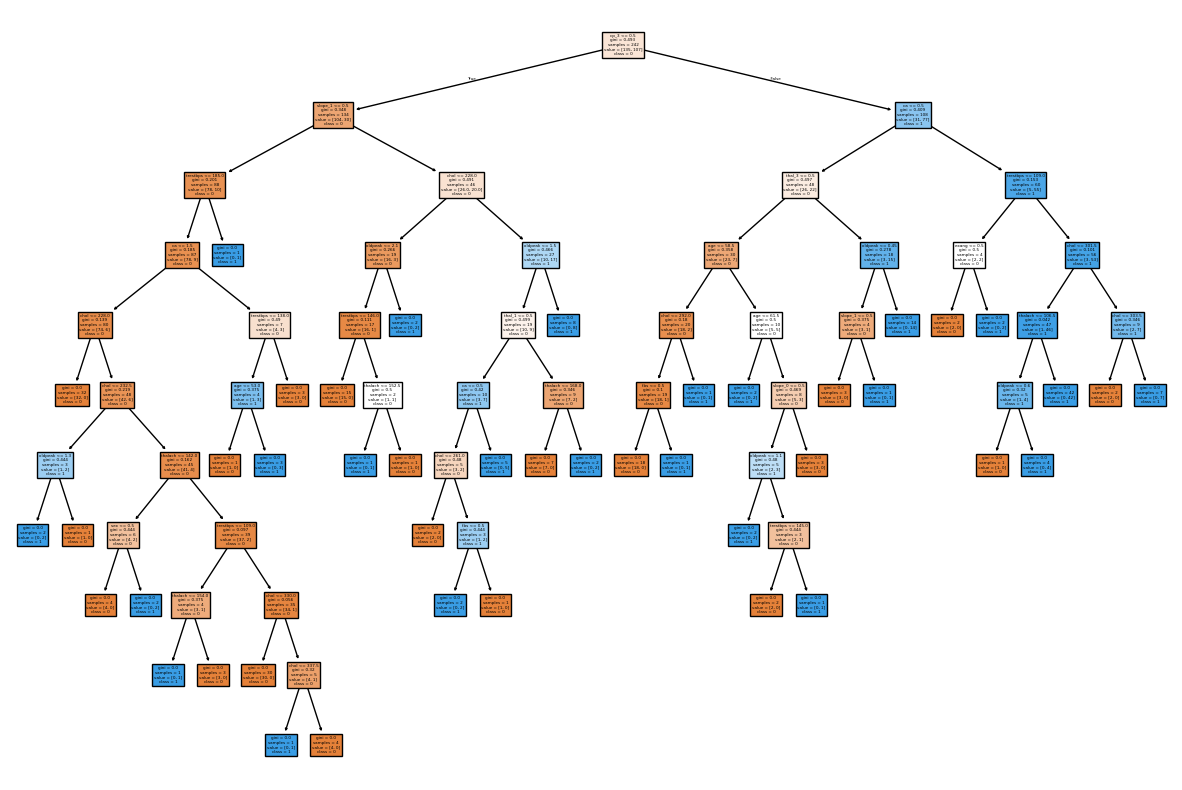

In [171]:
plt.figure(figsize=(15, 10))
plot_tree(clf_dt, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.show()

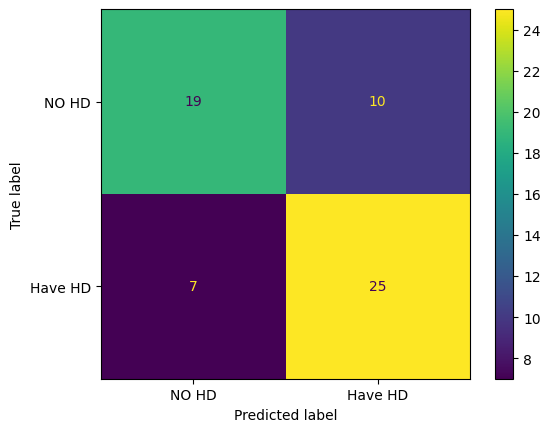

              precision    recall  f1-score   support

           0       0.73      0.66      0.69        29
           1       0.71      0.78      0.75        32

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



In [172]:
cm = confusion_matrix(y_test, y_predicted)
disp = ConfusionMatrixDisplay(cm, display_labels=["NO HD", "Have HD"])
disp.plot()
plt.show()
print(classification_report(y_test, y_predicted))

In [173]:
# cost complexity pruning Part 1 : Visyualize Alpha
# we will work with different values of alpha
# pruning is always done on the training dataset
# determining the value of alpha
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)


In [174]:
print(path)

{'ccp_alphas': array([0.        , 0.00388916, 0.00392032, 0.00404431, 0.00495868,
       0.00495868, 0.0053719 , 0.00550964, 0.00616921, 0.00619835,
       0.00619835, 0.00706236, 0.00743802, 0.00743802, 0.00744754,
       0.00881543, 0.01089604, 0.01288805, 0.01310032, 0.01446281,
       0.02051021, 0.02574874, 0.03347107, 0.0462963 , 0.11822024]), 'impurities': array([0.        , 0.00777832, 0.02345961, 0.03154823, 0.04146558,
       0.05138294, 0.06212674, 0.06763638, 0.09231322, 0.09851157,
       0.10470992, 0.12589699, 0.13333501, 0.14821104, 0.17800121,
       0.18681663, 0.20860872, 0.22149677, 0.23459709, 0.2490599 ,
       0.26957012, 0.29531886, 0.32878993, 0.37508623, 0.49330647])}


In [175]:
# extracting the different values of alpha
ccp_alphas = path.ccp_alphas

In [176]:
print(ccp_alphas)

[0.         0.00388916 0.00392032 0.00404431 0.00495868 0.00495868
 0.0053719  0.00550964 0.00616921 0.00619835 0.00619835 0.00706236
 0.00743802 0.00743802 0.00744754 0.00881543 0.01089604 0.01288805
 0.01310032 0.01446281 0.02051021 0.02574874 0.03347107 0.0462963
 0.11822024]


In [177]:
ccp_alphas = ccp_alphas[:-1]# exclude the maximumm values
# because that will just leave us with leaf of the tree

In [178]:
print(ccp_alphas)

[0.         0.00388916 0.00392032 0.00404431 0.00495868 0.00495868
 0.0053719  0.00550964 0.00616921 0.00619835 0.00619835 0.00706236
 0.00743802 0.00743802 0.00744754 0.00881543 0.01089604 0.01288805
 0.01310032 0.01446281 0.02051021 0.02574874 0.03347107 0.0462963 ]


In [179]:
clf_dts = []
for i in ccp_alphas:
  clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=i)
  clf_dt.fit(X_train, y_train)
  clf_dts.append(clf_dt)

In [180]:
print(clf_dts)

[DecisionTreeClassifier(random_state=42), DecisionTreeClassifier(ccp_alpha=0.003889158969372874, random_state=42), DecisionTreeClassifier(ccp_alpha=0.003920322102140283, random_state=42), DecisionTreeClassifier(ccp_alpha=0.0040443115878319, random_state=42), DecisionTreeClassifier(ccp_alpha=0.004958677685950413, random_state=42), DecisionTreeClassifier(ccp_alpha=0.004958677685950413, random_state=42), DecisionTreeClassifier(ccp_alpha=0.005371900826446282, random_state=42), DecisionTreeClassifier(ccp_alpha=0.005509641873278236, random_state=42), DecisionTreeClassifier(ccp_alpha=0.006169209578300493, random_state=42), DecisionTreeClassifier(ccp_alpha=0.006198347107438017, random_state=42), DecisionTreeClassifier(ccp_alpha=0.006198347107438017, random_state=42), DecisionTreeClassifier(ccp_alpha=0.0070623591284748296, random_state=42), DecisionTreeClassifier(ccp_alpha=0.007438016528925621, random_state=42), DecisionTreeClassifier(ccp_alpha=0.007438016528925622, random_state=42), DecisionTr

In [181]:
train_scores = [i.score(X_train, y_train) for i in clf_dts]
test_scores = [i.score(X_test, y_test) for i in clf_dts]

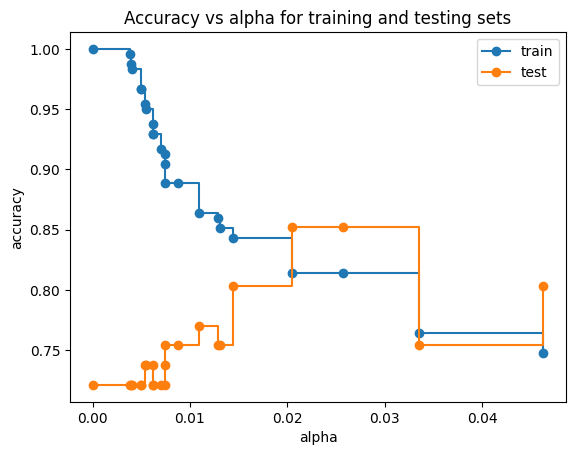

In [182]:
fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

In [183]:
# cost complexity pruning using cross validation
# different datasets have different ccp_alpha values
# which means it is sensitive to the data
# lets prove it
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.015)
scores = cross_val_score(clf_dt, X,y, cv = 5)
# this is validation score means on validation set
# in cross validation score we need to mentions the model we used as a paratmeters
print(scores)

[0.78688525 0.90163934 0.80327869 0.75       0.76666667]


In [184]:
score_list = []
for i in ccp_alphas:
  clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=i)
  scores = cross_val_score(clf_dt, X,y, cv = 5)
  score_list.append(scores.mean())
  print(f"for alpha = {i}  our scores are : {scores.mean()}")

for alpha = 0.0  our scores are : 0.7424043715846995
for alpha = 0.003889158969372874  our scores are : 0.75224043715847
for alpha = 0.003920322102140283  our scores are : 0.75224043715847
for alpha = 0.0040443115878319  our scores are : 0.7489071038251366
for alpha = 0.004958677685950413  our scores are : 0.755464480874317
for alpha = 0.004958677685950413  our scores are : 0.755464480874317
for alpha = 0.005371900826446282  our scores are : 0.755464480874317
for alpha = 0.005509641873278236  our scores are : 0.7488524590163935
for alpha = 0.006169209578300493  our scores are : 0.7488524590163935
for alpha = 0.006198347107438017  our scores are : 0.7521311475409836
for alpha = 0.006198347107438017  our scores are : 0.7521311475409836
for alpha = 0.0070623591284748296  our scores are : 0.7554098360655738
for alpha = 0.007438016528925621  our scores are : 0.7587431693989071
for alpha = 0.007438016528925622  our scores are : 0.7587431693989071
for alpha = 0.007447541175781022  our scores 

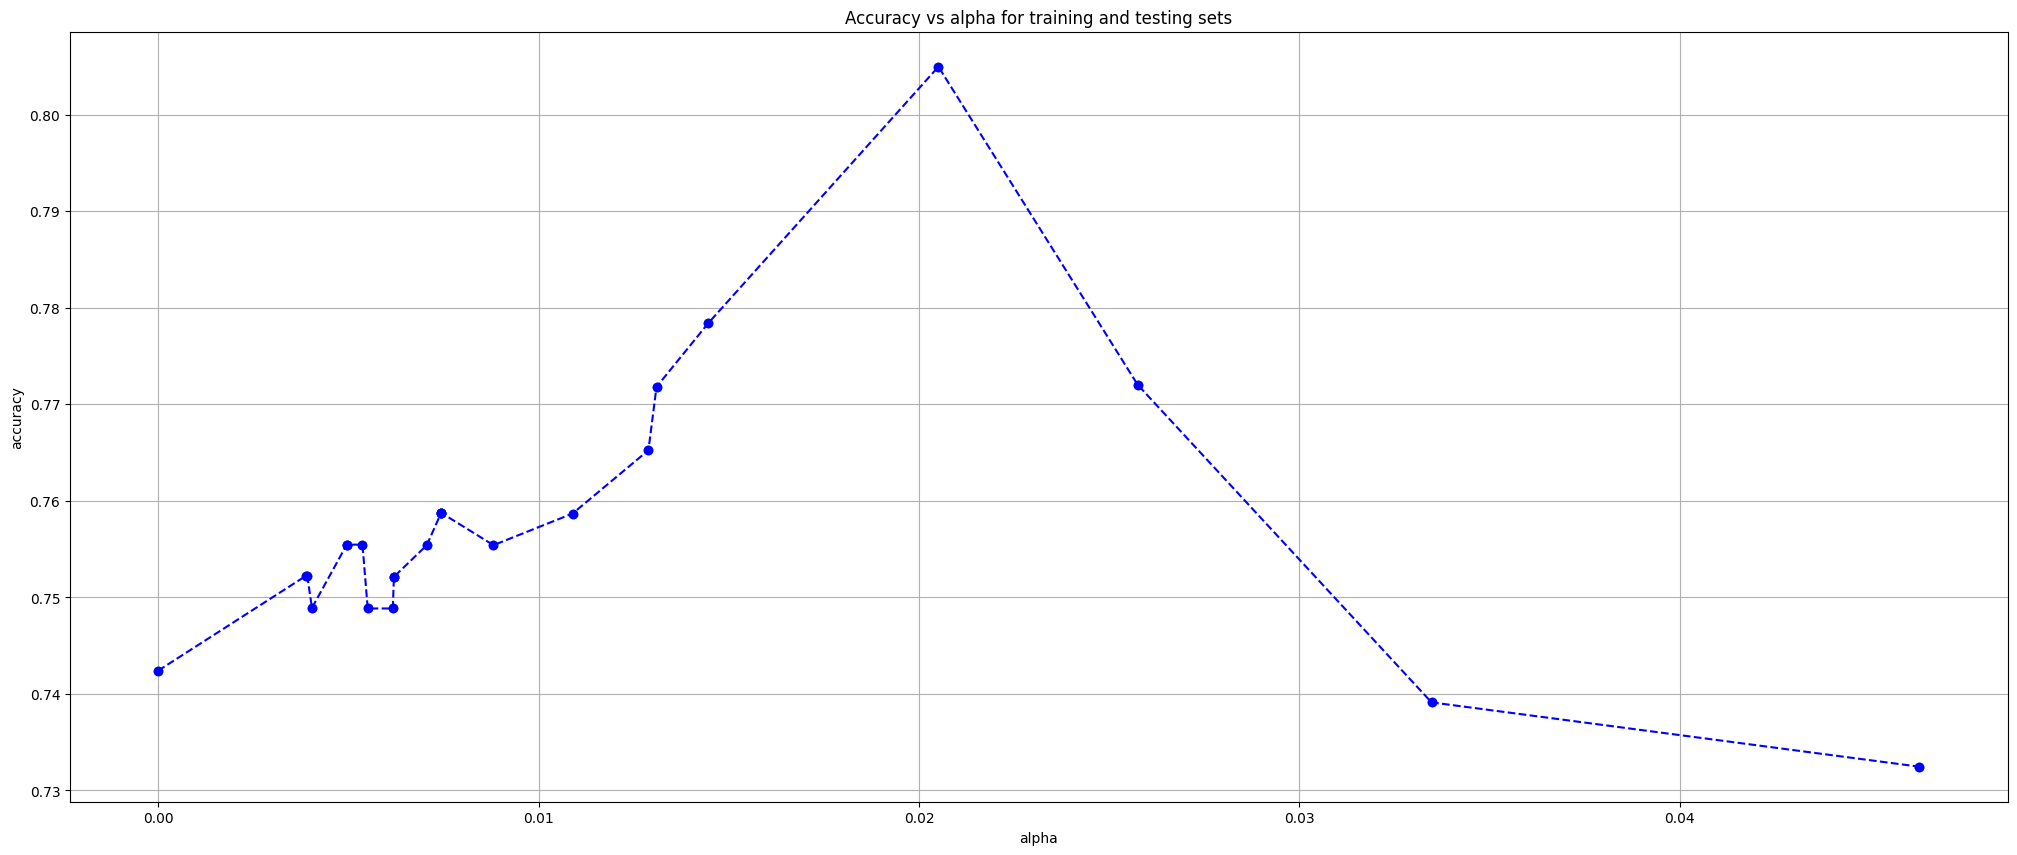

In [185]:
plt.figure(figsize=(25, 10))
plt.scatter(ccp_alphas, score_list)
plt.plot(ccp_alphas, score_list, color='blue', marker = 'o', linestyle = "--")
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.title('Accuracy vs alpha for training and testing sets')
plt.grid()
plt.show()

In [186]:
ideal_alpha = ccp_alphas[np.argmax(score_list)]
print(ideal_alpha)

0.02051021272989237


In [187]:
np.argmax(score_list)

20

In [188]:
type(ideal_alpha)

numpy.float64

In [189]:
clf_dt_ideal = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_alpha)
clf_dt_ideal.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.02051021272989237, random_state=42)

In [190]:
clf_dt_ideal.score(X_test, y_test)

0.8524590163934426

In [191]:
clf_dt_ideal.score(X_train, y_train)

0.8140495867768595

In [192]:
y_predicted_ideal = clf_dt_ideal.predict(X_test)

In [193]:
confusion_matrix(y_test, y_predicted_ideal)

array([[27,  2],
       [ 7, 25]])

In [194]:
print(classification_report(y_test, y_predicted_ideal))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



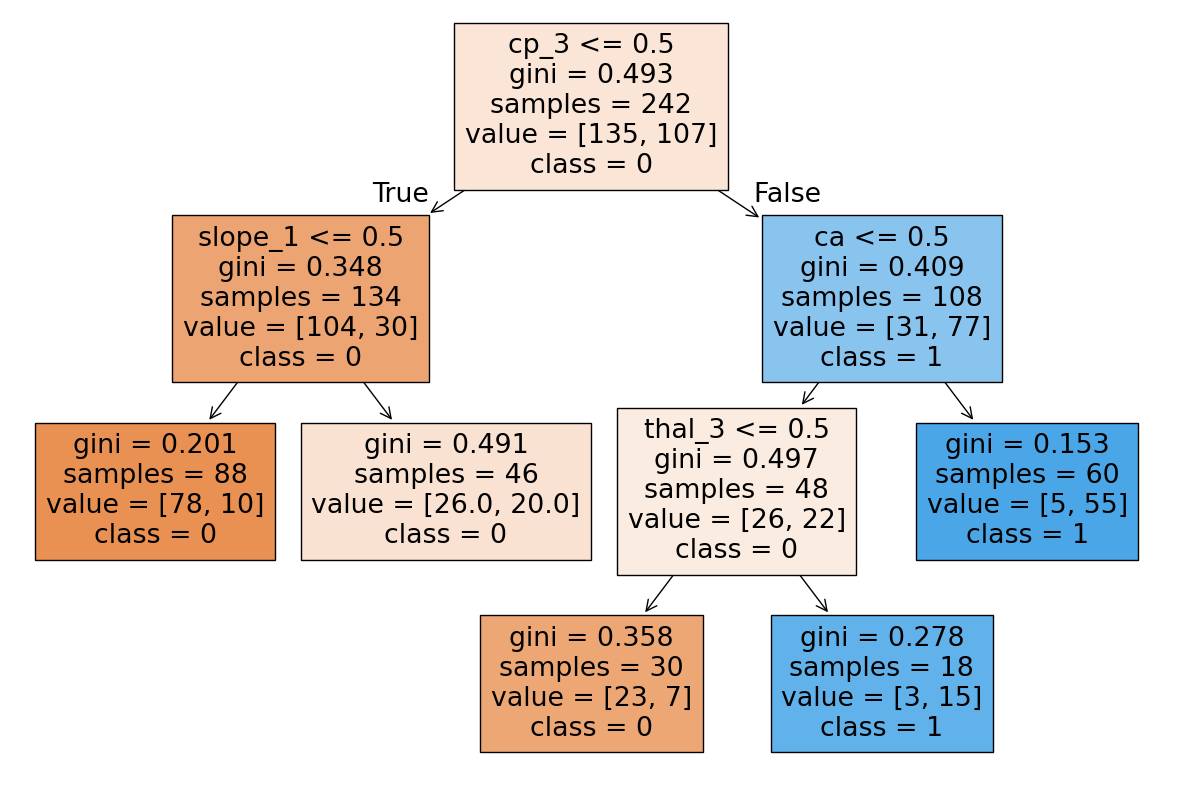

In [195]:
plt.figure(figsize=(15, 10))
plot_tree(clf_dt_ideal, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.show()